In [76]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [77]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [78]:
train_input.shape

(60000, 28, 28)

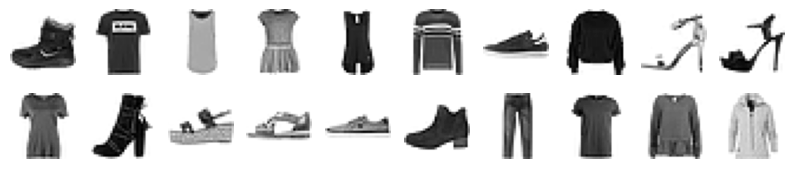

In [79]:
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [80]:
# train세트 - train, val(검증), test세트로
# 표준화
# train_scaled = train_input/255
train_scaled = train_input.reshape(-1,28,28,1)/255
train_scaled.shape


(60000, 28, 28, 1)

In [81]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
) 

In [82]:
# 딥러닝 훈련 : 인공신경망(ANN) - 1차원 배열로 전환하여 훈련

# 데이터 전처리
# train_scaled = train_input.reshape(-1,28,28,1)/255
# train_scaled.shape

# 모델결정 model = keras.Sequential()

# 합성곱 신경망(CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)) 
# 최대풀링 : model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망 생성
# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')) # 선언
# model.add(keras.layers.MaxPooling2D(2))
# model.add(keras.layers.Flatten()) # 1차원으로 변경
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10,activation='softmax'))

#---------------------------------------------------------------------------------
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.3))                    # 30%를 제외시키는 규제적용(과대적합 epoch 때문에)
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))  # train_target.unique()의 숫자에 맞춰야 함
#----------------------------------------------------------------------------------

# 모델설정 옵티마이저 : 경사하강법의 방법으로 손실률을 찾는 방법 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras') # 전전 위치 저장
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) # 증가가 2번 이상이 되는 point 찾기
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled, val_target)

# test세트 검증 - 3차원  행렬로 변경해서 검증
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# 모델평가 model.evaluate(test_scaled, test_target)

In [83]:
# 1차 합성신경곱(CNN) 
# CNN 선언 및 설정 후 ANN 순서대로 진행
model = keras.Sequential()
# padding = 'same' / 'valid'(padding 사용하지 않음) 
# input_shape =  (28,28,1) : 사이즈 28*28 그레이색상 1,  (28,28,3) - 사이즈 28*28, RGB색상 3개
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1))) # 선언
# 풀링
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# 2차 합성곱 신경망 생성
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')) # 선언
model.add(keras.layers.MaxPooling2D(2))

In [85]:
model.add(keras.layers.Flatten()) # 1차원으로 변경
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [86]:
model.summary()

# con2D param 사이즈 : kernel_size(3,3) * 깊이(1) * 필터(32개) - 3*3*32 +32  = 320
# MaxPooling2D : 사이즈가 절반으로 변경
# Flatten : 1차원 행렬 14*14*32 =6275

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

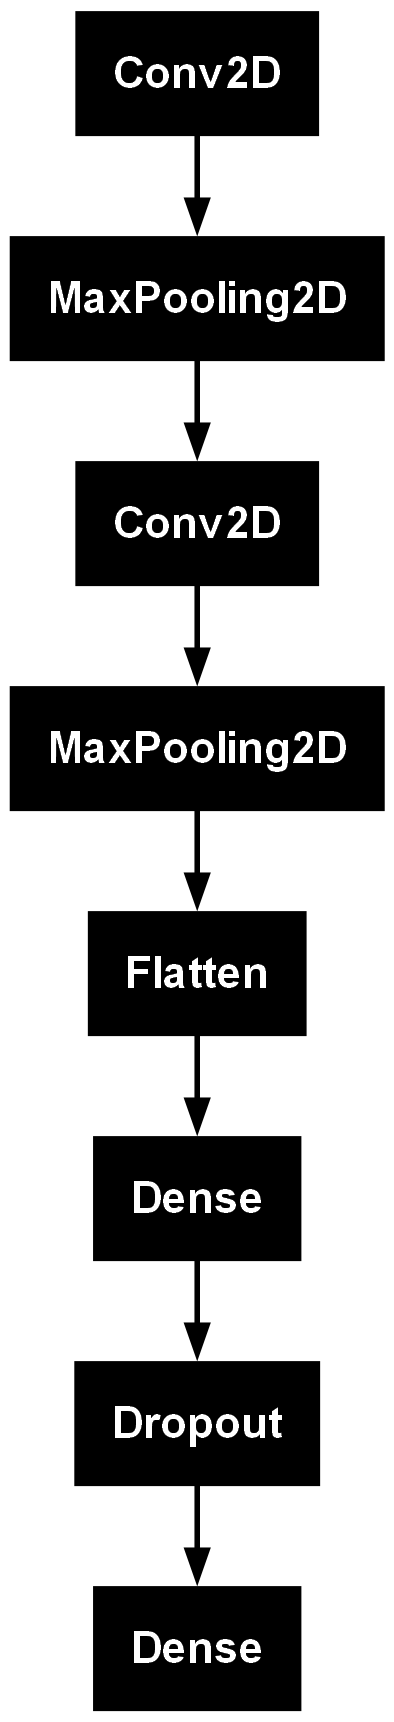

In [87]:
keras.utils.plot_model(model)

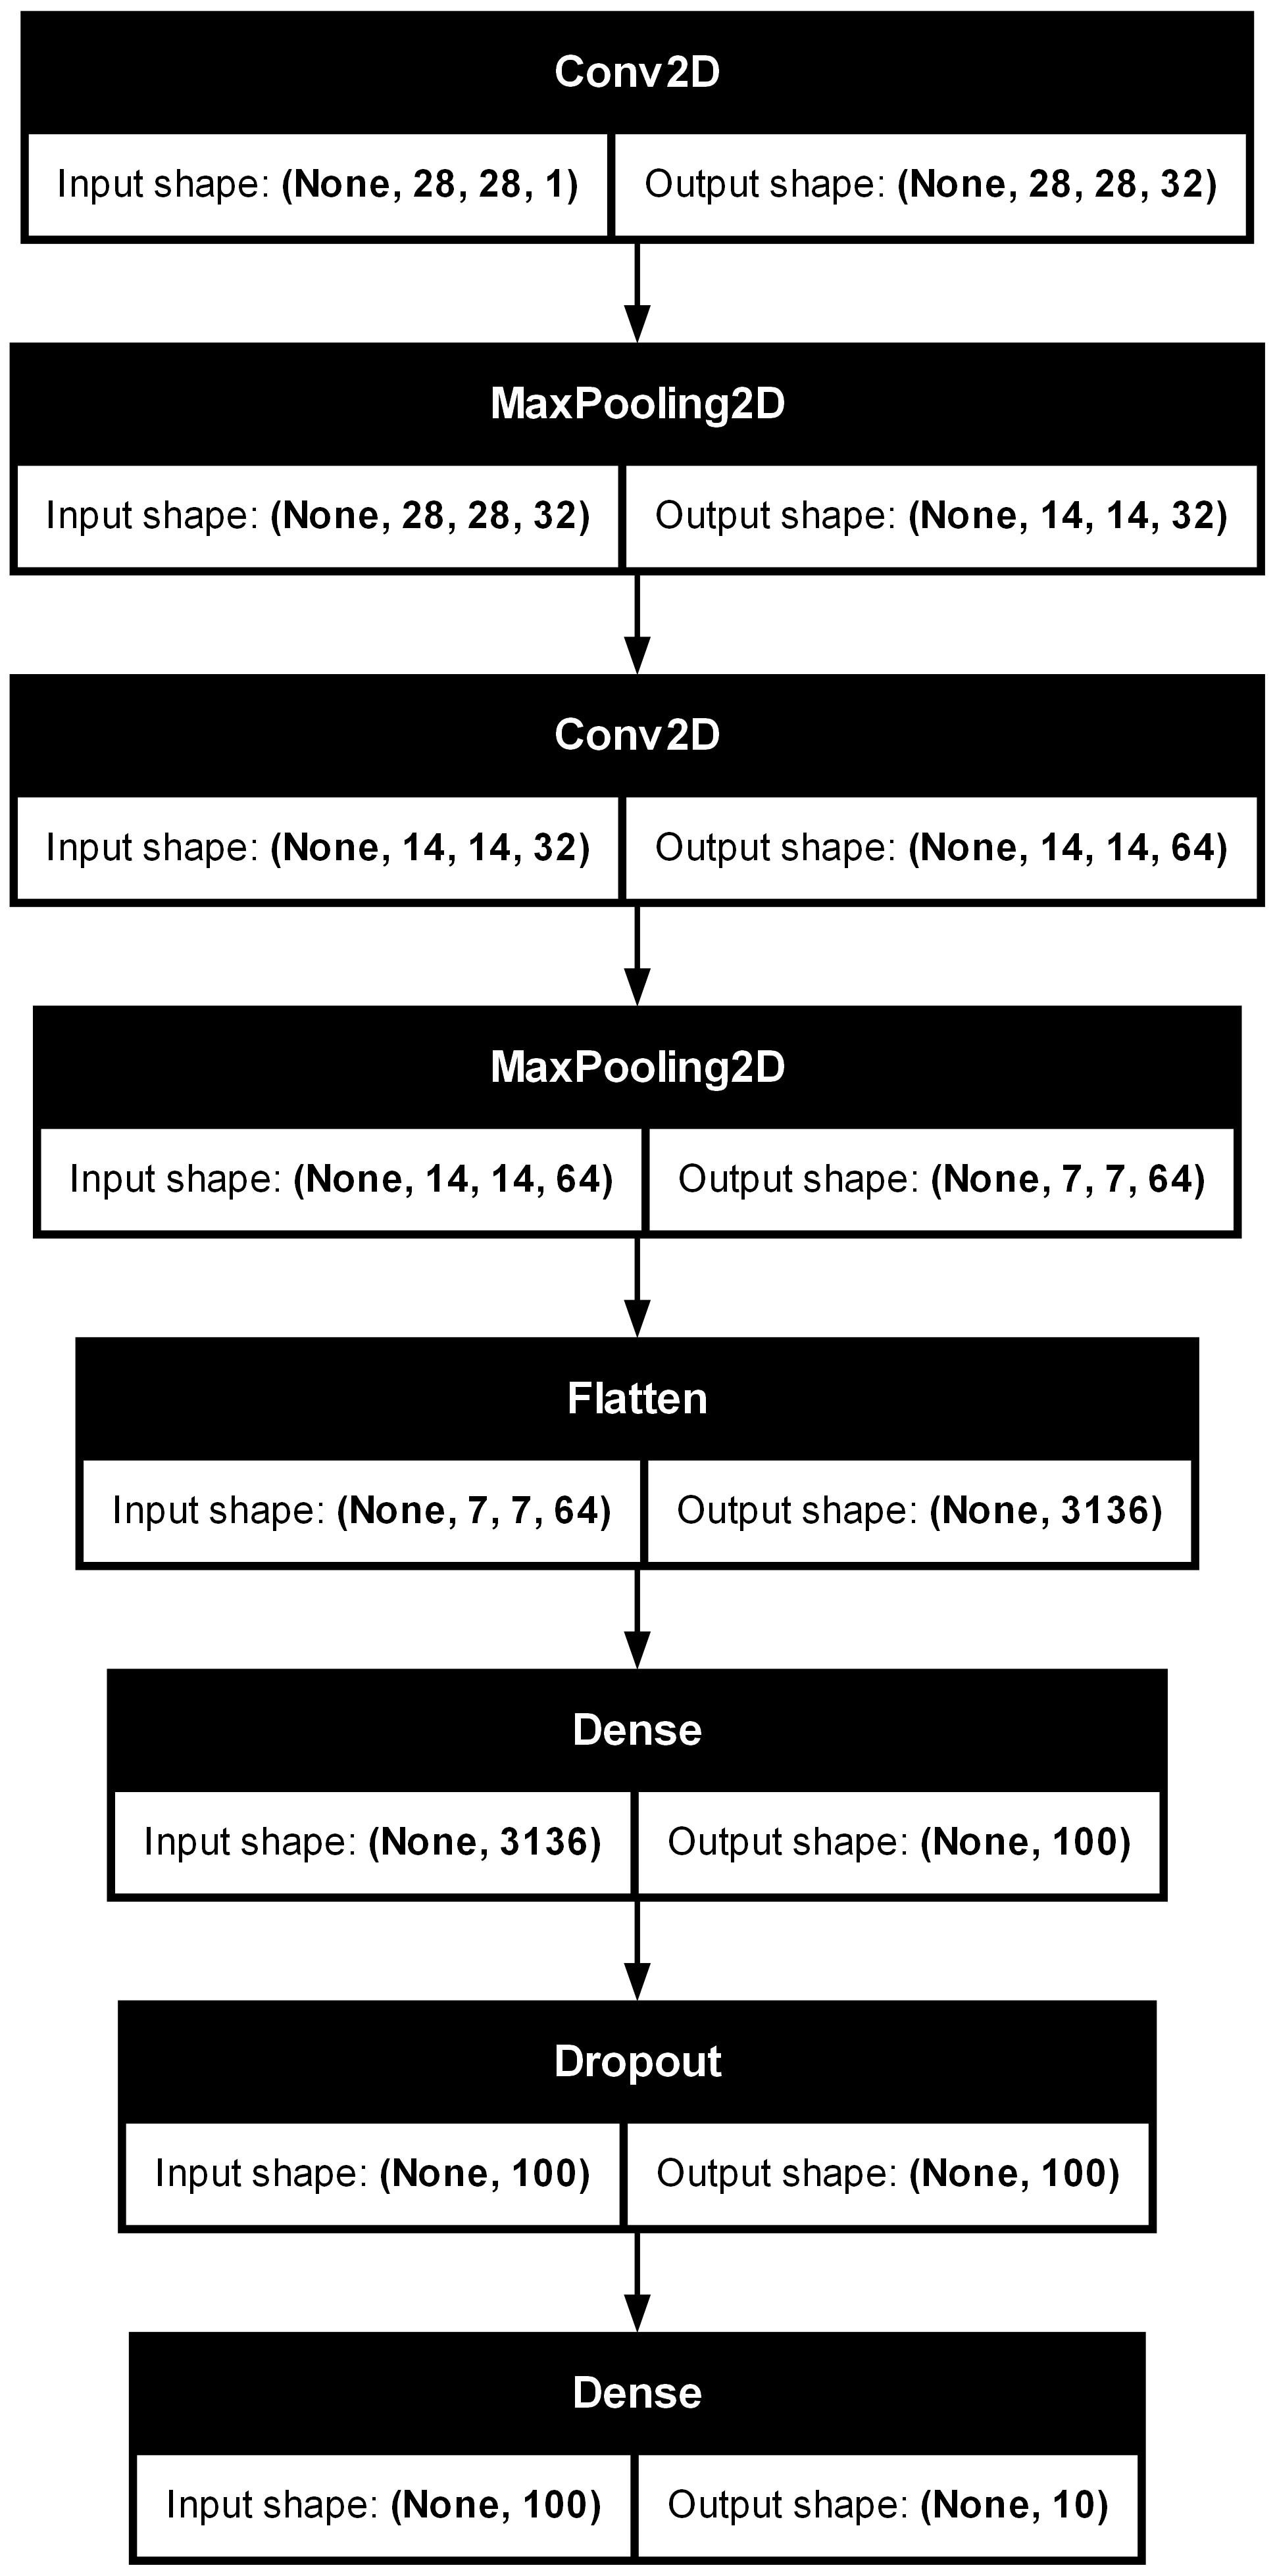

In [88]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn_a.png', dpi=300)

In [89]:
# 모델설정 옵티마이저 : 경사하강법의 방법으로 손실률을 찾는 방법 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras') # 전전 위치 저장
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) # 증가가 2번 이상이 되는 point 찾기
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled, val_target)

In [90]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target,batch_size=32, epochs=20,
                    validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7407 - loss: 0.7257 - val_accuracy: 0.8808 - val_loss: 0.3265
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8751 - loss: 0.3466 - val_accuracy: 0.9038 - val_loss: 0.2651
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8938 - loss: 0.2971 - val_accuracy: 0.9032 - val_loss: 0.2650
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9056 - loss: 0.2611 - val_accuracy: 0.9126 - val_loss: 0.2365
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9115 - loss: 0.2370 - val_accuracy: 0.9140 - val_loss: 0.2288
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9193 - loss: 0.2149 - val_accuracy: 0.9158 - val_loss: 0.2285
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9272 - loss: 0.1940 - val_accuracy: 0.9203 - val_loss: 0.2191
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9325 - los

In [91]:
early_stopping_cb.stopped_epoch

10

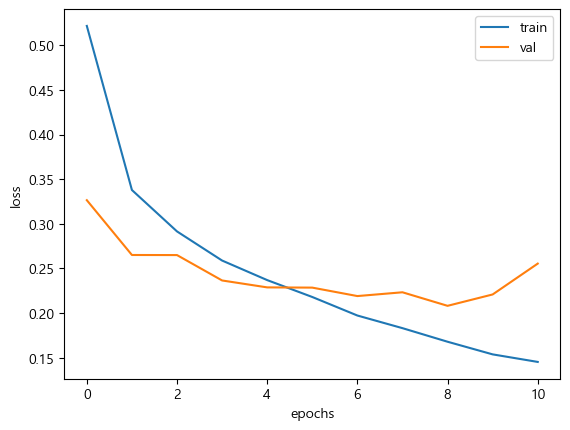

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [93]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9253 - loss: 0.2044


[0.20811685919761658, 0.925166666507721]

In [94]:
val_scaled[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.01568627, 0.        , 0.        , 0.57647059, 0.49019608,
        0.41568627, 0.4431

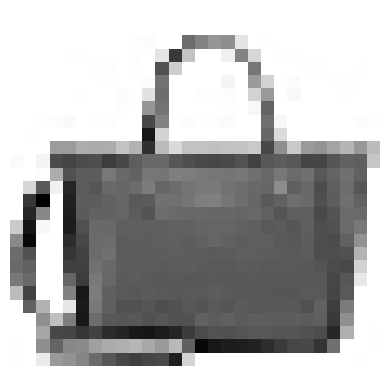

In [95]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [96]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬이기 때문
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[7.76935368e-21 2.49211082e-26 8.01721754e-25 2.92042753e-18
  1.27830614e-17 3.29352342e-18 3.73601748e-22 4.28854022e-18
  1.00000000e+00 1.01646714e-18]]


In [97]:
predict[0]

array([7.76935368e-21, 2.49211082e-26, 8.01721754e-25, 2.92042753e-18,
       1.27830614e-17, 3.29352342e-18, 3.73601748e-22, 4.28854022e-18,
       1.00000000e+00, 1.01646714e-18], dtype=float32)

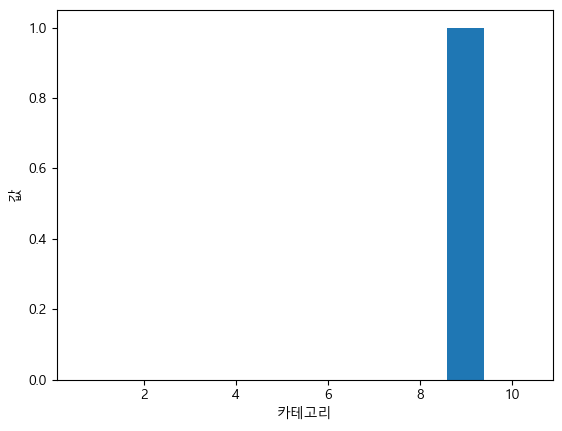

In [98]:
plt.bar(range(1,11), predict[0])
plt.xlabel('카테고리')
plt.ylabel('값')
plt.show()

In [99]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [100]:
print(classes[np.argmax(predict)])  # np.argmax : 최대값의 index값을 리턴

가방


In [101]:
# test세트 검증
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [102]:
# test세트 정확도
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9158 - loss: 0.2477


[0.24245058000087738, 0.9164000153541565]

### 합성신경곱(CNN)

In [103]:
# 합성신경곱(CNN) - 2차원 자체로 훈련 먼저
# CNN 선언 및 설정 후 ANN 순서대로 진행
model = keras.Sequential()
# padding = 'same' / 'valid'(padding 사용하지 않음) 
# input_shape =  (28,28,1) : 사이즈 28*28 그레이색상 1,  (28,28,3) - 사이즈 28*28, RGB색상 3개
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1))) # 선언
# 풀링
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten()) # 1차원으로 변경
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [104]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,630 (2.40 MB)

 Trainable params: 628,630 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

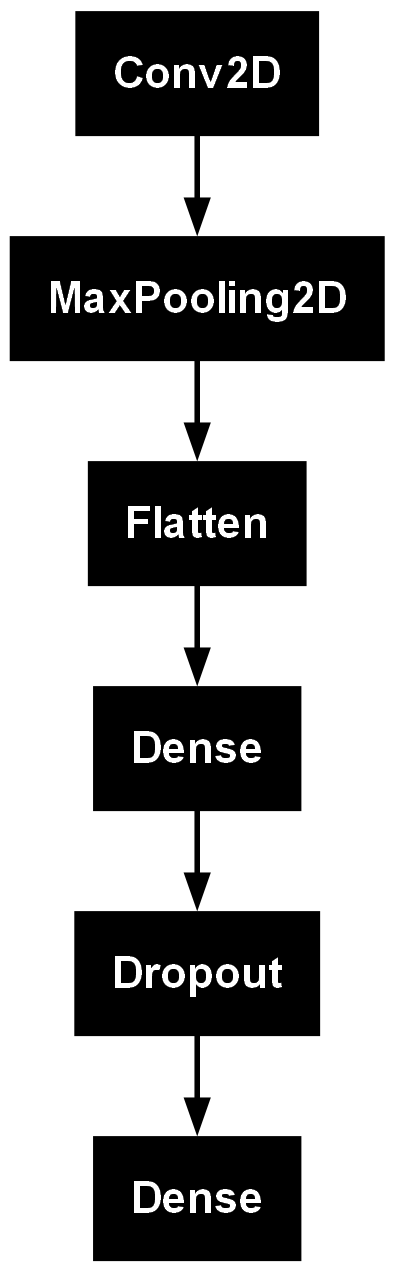

In [105]:
keras.utils.plot_model(model)

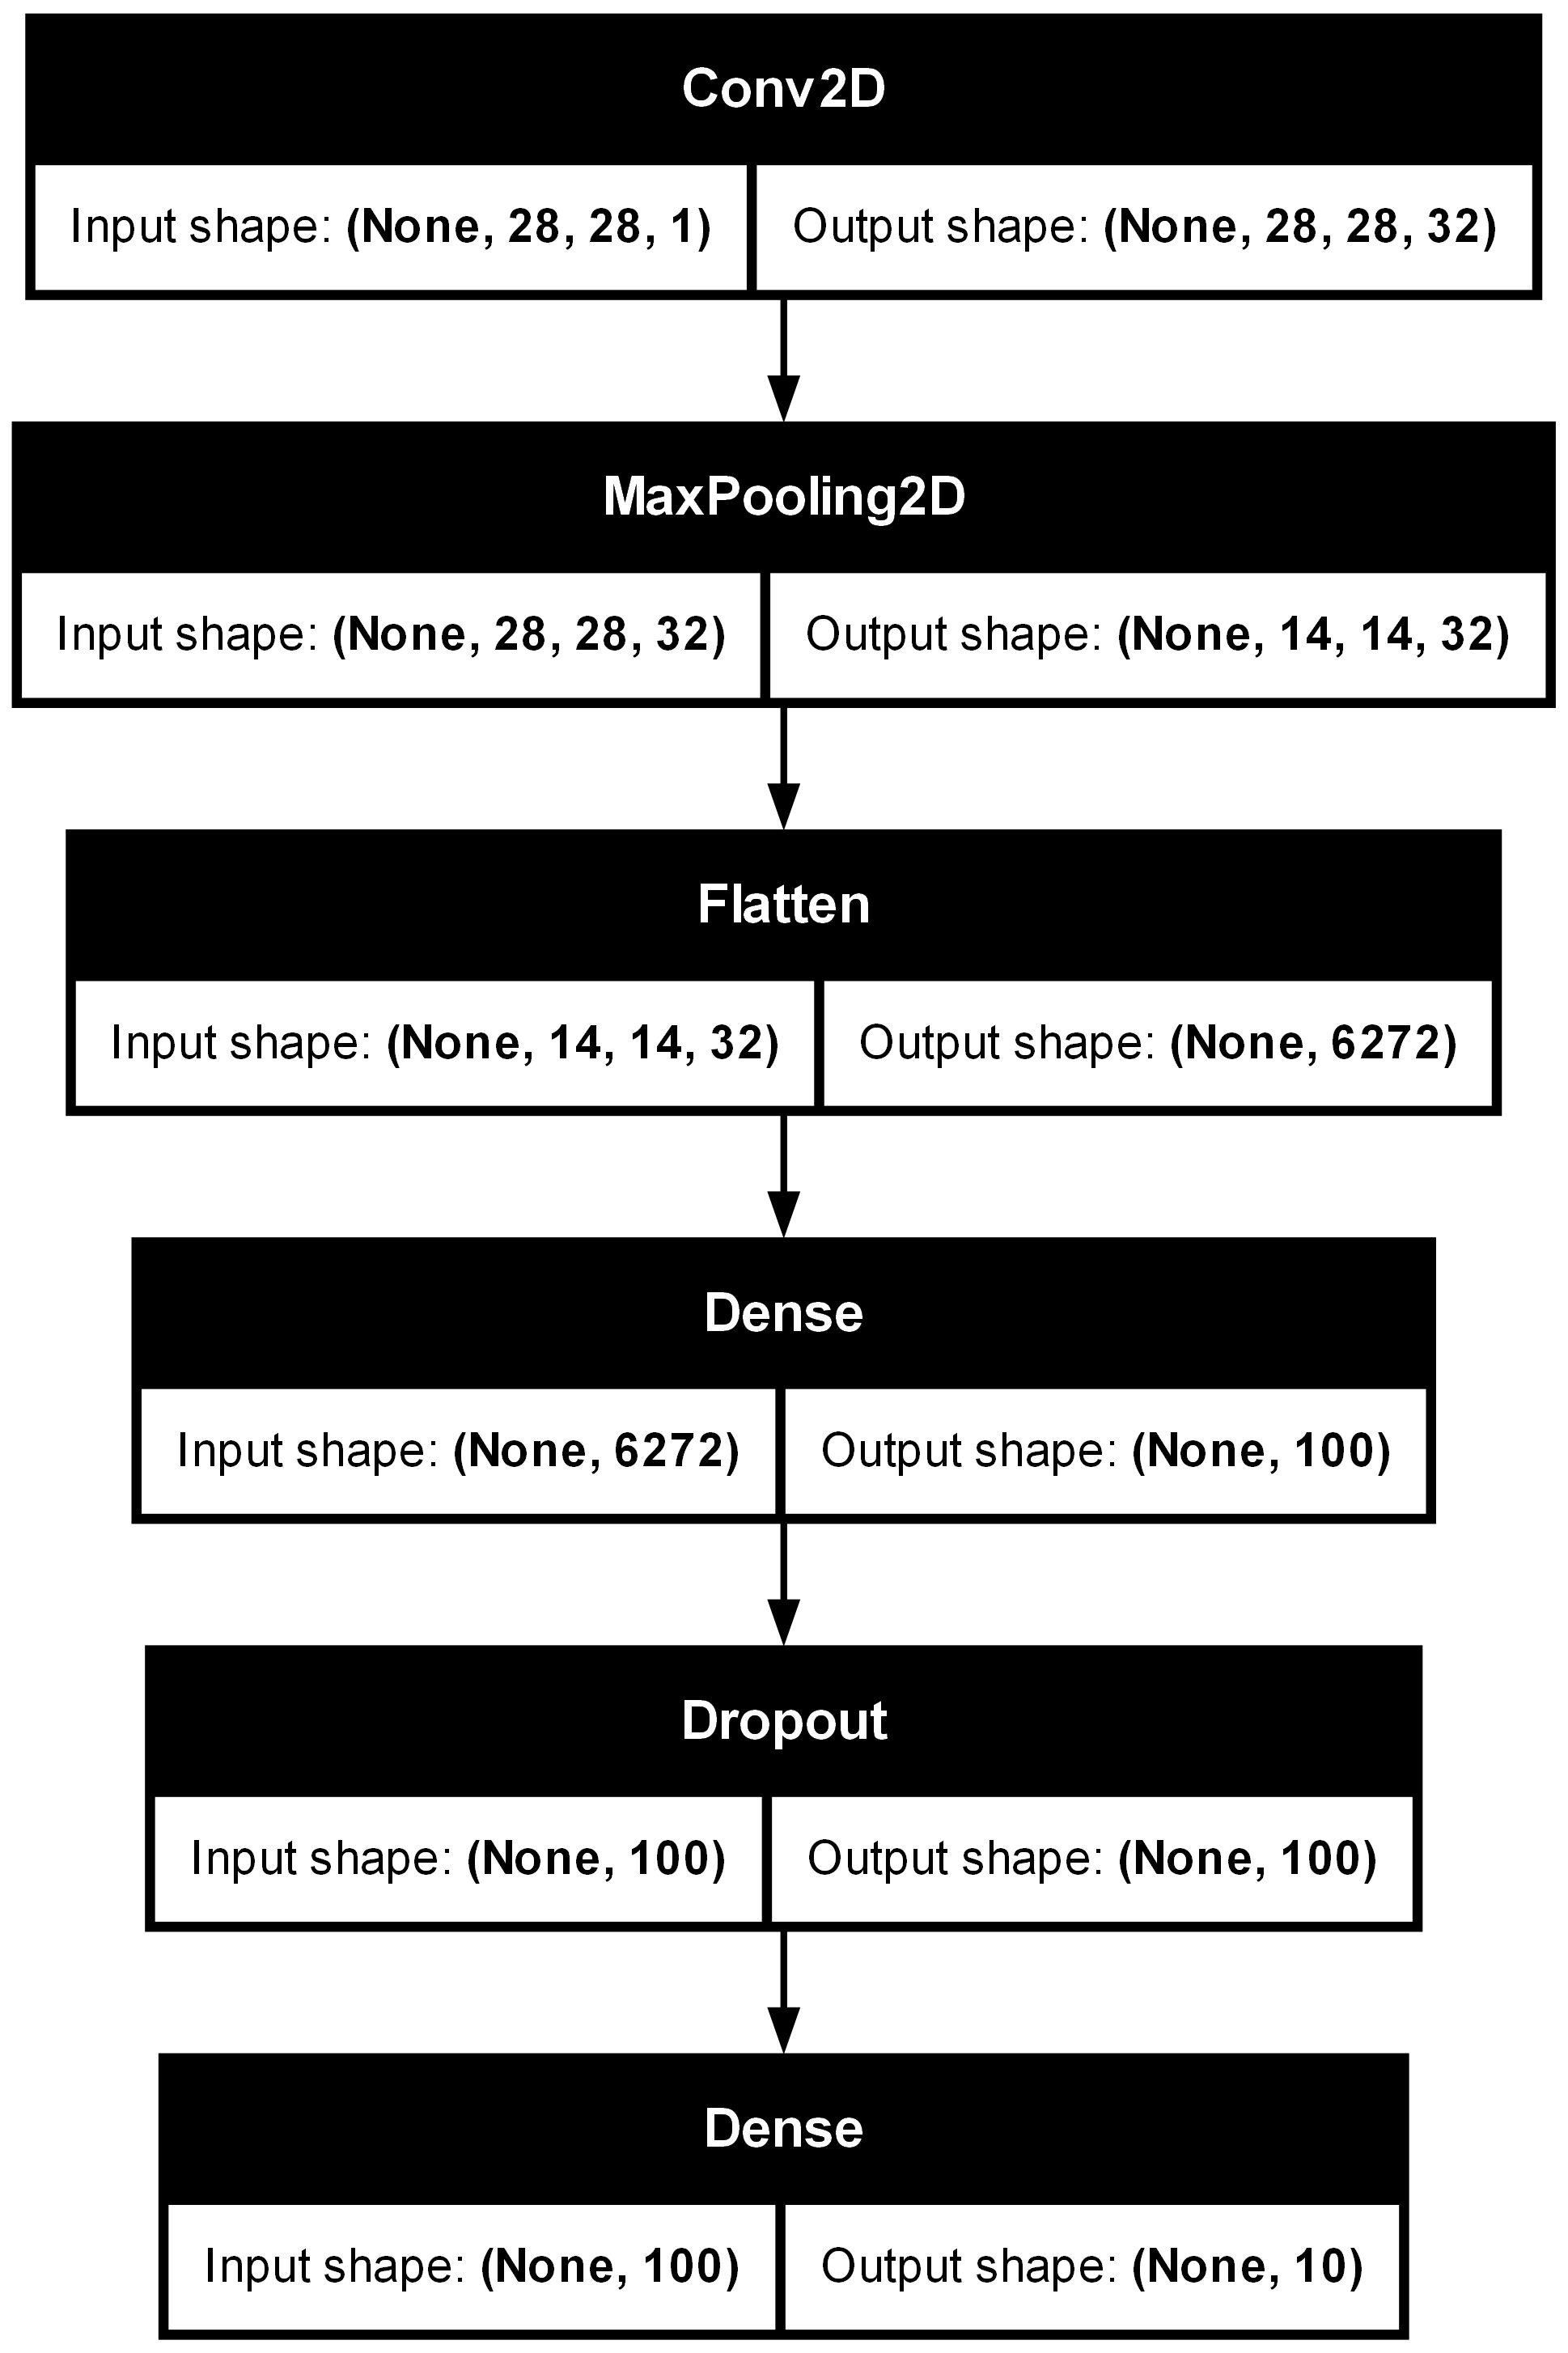

In [106]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn_a.png', dpi=300)